In [22]:
# 1. Import thư viện cần thiết
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler


In [23]:
# 2. Đọc file dữ liệu chứng khoán JD và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv("JD.csv")
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [24]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
# Huấn luyện mô hình với dữ liệu train
from sklearn.svm import SVR
model = SVR(kernel='rbf')
model.fit(x_train, y_train)

SVR()

In [25]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [26]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[53.89669131 53.87505548 53.85366425 53.83251601 53.81160913 53.79094196
 53.77051286 53.75032018 53.73036223 53.71063736 53.69114389 53.67188012
 53.65284437 53.63403495 53.61545014 53.59708825 53.57894756 53.56102635
 53.54332292 53.52583552 53.50856245 53.49150197 53.47465236 53.45801187
 53.44157878 53.42535135 53.40932785 53.39350654 53.37788569 53.36246356]


In [27]:
# 7. Đánh giá độ chính xác validate, test
valid_rsme = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE: ', valid_rsme)
print('Testing RMSE: ', test_rmse) 

Validation RMSE:  13.375591721475562
Testing RMSE:  10.468185784759351


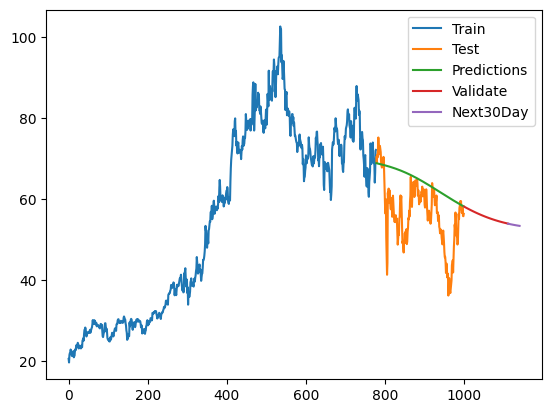

In [28]:
# 8. Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()